In [104]:
# Libraries
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

#Torch imports 
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F
from torch.utils.data import Dataset

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, accuracy_score, confusion_matrix, classification_report


In [105]:
# Common functions
%matplotlib inline
cmap = sns.cm.rocket_r

## Graph correlation matrix
def graph_corr_matrix(corr, channels):
    sns.heatmap(np.average(corr, axis=0), cmap=cmap, vmax=1, vmin=0, xticklabels=channels, yticklabels=channels)

def under_sampling(df, column): 
    g = df.groupby(column)
    df_usampling = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)
    return df_usampling

def showClassficationReport(y_pred, y_true, tick_labels,  top_n = 1):
    # Loop on each generator batch and predict

    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(len(tick_labels)))

    conf_matrix = conf_matrix/np.sum(conf_matrix, axis=1)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", square=True, cbar=False, 
                cmap=plt.cm.jet, xticklabels=tick_labels, yticklabels=tick_labels,
                ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion Matrix')
    plt.show()
 
    class_report = classification_report(y_true, y_pred)
    return class_report, fig

In [106]:
# Constants
channels = ['Fp1','F7','F8','T4','T6','T5','T3','Fp2','O1','P3','Pz','F3','Fz','F4','C4','P4','POz','C3','Cz','O2']

In [187]:
df = pd.read_pickle('Results/corr_dataset_1_minute_ASR.pkl')
df.head(5)

,UID,Condition,Correlation
0,9003_RSEC_0,HC,"[[1.0, 0.9585196, 0.93820804, 0.8715865, 0.844..."
1,9003_RSEC_1,HC,"[[1.0, 0.92713577, 0.8629101, 0.74655974, 0.61..."
2,9003_RSEC_2,HC,"[[1.0, 0.922027, 0.8385028, 0.74926996, 0.6286..."
3,9003_RSEC_3,HC,"[[1.0, 0.92454684, 0.8485801, 0.7549646, 0.622..."
4,9003_RSEC_4,HC,"[[1.0, 0.9874712, 0.97519207, 0.9614993, 0.943..."


In [188]:
# Undersampling 
df_usampling = under_sampling(df, 'Condition')

df_usampling.head()

,UID,Condition,Correlation
0,9272_RSEC_4,AD,"[[1.0, 0.9623021, 0.9466661, 0.9161017, 0.9031..."
1,9231_RSEC_1,AD,"[[1.0, 0.85222995, 0.7721689, 0.77530247, 0.72..."
2,9219_RSEC_4,AD,"[[1.0, 0.98761785, 0.98175293, 0.97711724, 0.9..."
3,9272_RSEC_0,AD,"[[1.0, 0.945582, 0.9220656, 0.8702943, 0.84839..."
4,9206_RSEO_2,AD,"[[1.0, 0.8800449, 0.8252788, 0.50173783, 0.416..."


In [189]:
X = np.stack(df_usampling["Correlation"].ravel())
X.shape

(520, 20, 20)

c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Condition', ylabel='count'>

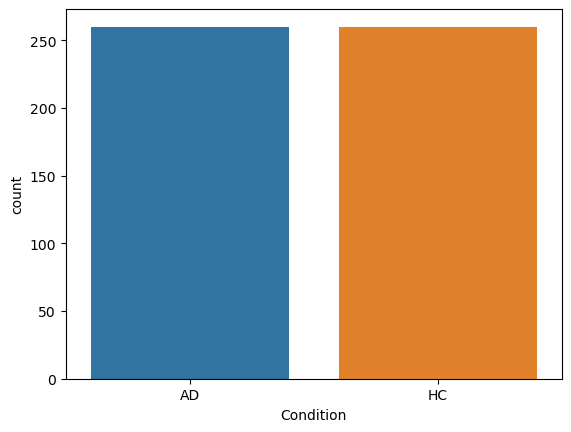

In [190]:
sns.countplot(df_usampling["Condition"])

In [191]:
# Binary enconding 
Y = df_usampling["Condition"].to_numpy()

l_encoder = LabelEncoder()
i_encoded = l_encoder.fit_transform(Y)

Y = i_encoded.reshape(1, -1).T
Y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [192]:
# Train and Test splitting 
X_train, X_test, y_train, y_test = train_test_split(   
     X, Y, test_size=0.2, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(   
#     X_train, y_train, test_size=0.1, random_state=42)

c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\jimmy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


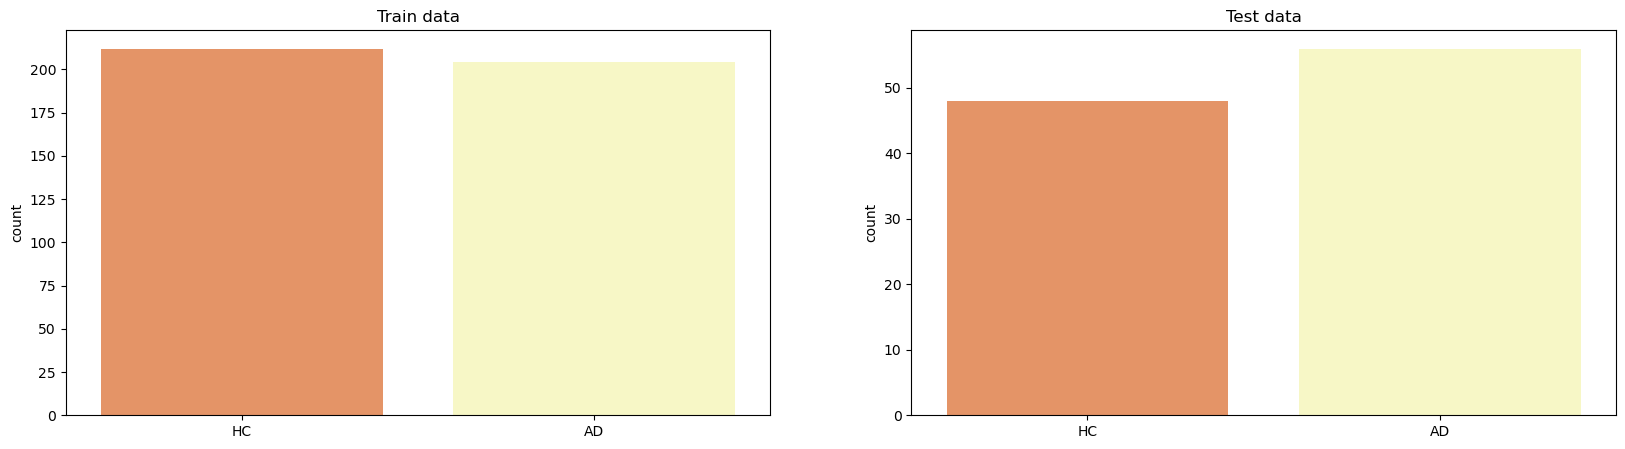

In [193]:
colors = sns.color_palette('Spectral', 3)
palette = {mode: color for mode, color in zip(["HC", "AD"], colors)}

fig, ax = plt.subplots(1,2,figsize=(20,5))


sns.countplot(l_encoder.inverse_transform(y_train.ravel()), ax=ax[0], palette=palette)
ax[0].set_title("Train data")

sns.countplot(l_encoder.inverse_transform(y_test.ravel()), ax=ax[1], palette=palette);
ax[1].set_title("Test data");

# Models

## Support Vector Machine 

In [194]:
X_train_reshape = X_train.reshape(X_train.shape[0],400)
X_test_reshape = X_test.reshape(X_test.shape[0],400)

In [195]:
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV

param_grid =  {'C': [1,10,100,1000], 'gamma': [0.01, 0.001, 0.0001],'kernel': ['rbf']}

grid = GridSearchCV(SVC(random_state=125),param_grid,refit=True, return_train_score=True)
grid.fit(X_train_reshape,y_train.ravel())

GridSearchCV(estimator=SVC(random_state=125),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
             return_train_score=True)

In [196]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

0.8365384615384616


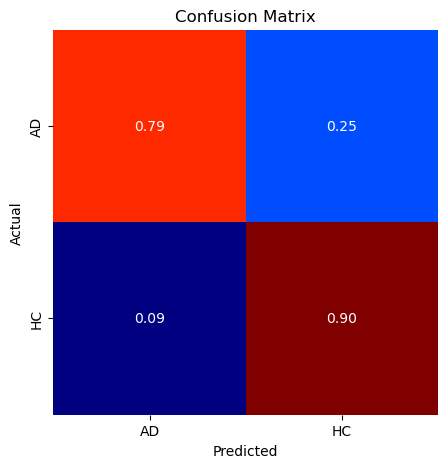

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        56
           1       0.78      0.90      0.83        48

    accuracy                           0.84       104
   macro avg       0.84      0.84      0.84       104
weighted avg       0.84      0.84      0.84       104



In [199]:
y_pred=grid.predict(X_test_reshape)

print(accuracy_score(y_test, y_pred))

class_report, fig = showClassficationReport(y_pred , y_test.T[0], ["AD", "HC"])
print(class_report)

fig.savefig("./Results/images/1minute_512_SVM_test.png")


0.9519230769230769


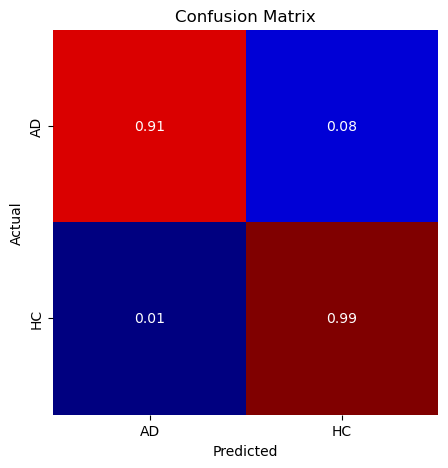

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       204
           1       0.92      0.99      0.95       212

    accuracy                           0.95       416
   macro avg       0.96      0.95      0.95       416
weighted avg       0.95      0.95      0.95       416



In [200]:
y_pred=grid.predict(X_train_reshape)

print(accuracy_score(y_train, y_pred))

class_report, fig = showClassficationReport(y_pred , y_train.T[0], ["AD", "HC"])
print(class_report)

fig.savefig("./Results/images/1minute_512_SVM_train.png")

## Random Forest

In [180]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [1, 2, 5, 10, 20, 80], 'max_features': [2, 3, 5, 10],'n_estimators': [1, 2, 3, 5, 10, 30, 50, 100, 200, 300, 500]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=125),param_grid,refit=True, return_train_score=True)
grid_rf.fit(X_train_reshape,y_train.ravel())

KeyboardInterrupt: 

In [174]:
grid_rf.best_params_

{'max_depth': 80, 'max_features': 10, 'n_estimators': 500}

0.8942307692307693


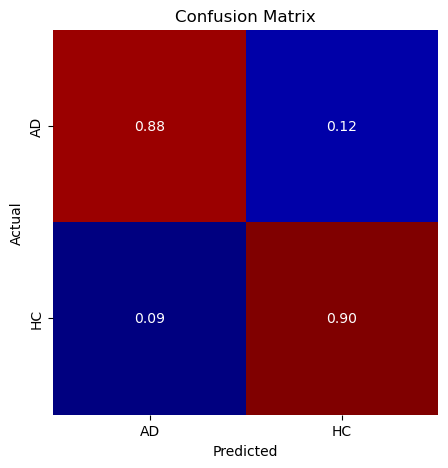

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       320
           1       0.88      0.90      0.89       304

    accuracy                           0.89       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.89      0.89      0.89       624



In [172]:
y_pred=grid_rf.predict(X_test_reshape)

print(accuracy_score(y_test, y_pred))

class_report, fig = showClassficationReport(y_pred , y_test.T[0], ["AD", "HC"])
print(class_report)

fig.savefig("./Results/images/10sec_512_SVM_test.png")


1.0


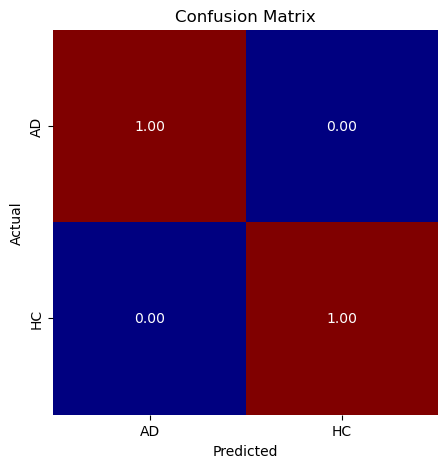

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1240
           1       1.00      1.00      1.00      1256

    accuracy                           1.00      2496
   macro avg       1.00      1.00      1.00      2496
weighted avg       1.00      1.00      1.00      2496



In [173]:
y_pred=grid_rf.predict(X_train_reshape)

print(accuracy_score(y_train, y_pred))

class_report, fig = showClassficationReport(y_pred , y_train.T[0], ["AD", "HC"])
print(class_report)

fig.savefig("./Results/images/10sec_512_SVM_train.png")

## MLP 

In [175]:
from sklearn.neural_network import MLPClassifier

parameter_space = {
    'hidden_layer_sizes': [(128,128,64)],
    'activation': ['relu'],
    'solver': ['lbfgs',],
    'alpha': [0.0001],
    'learning_rate': ['adaptive'],
    'learning_rate_init' : [ 0.01]}

clf = GridSearchCV(MLPClassifier(), parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_reshape, y_train) # X is train samples and y is the corresponding labels

c:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(128, 128, 64)],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [0.01], 'solver': ['lbfgs']})

0.8717948717948718


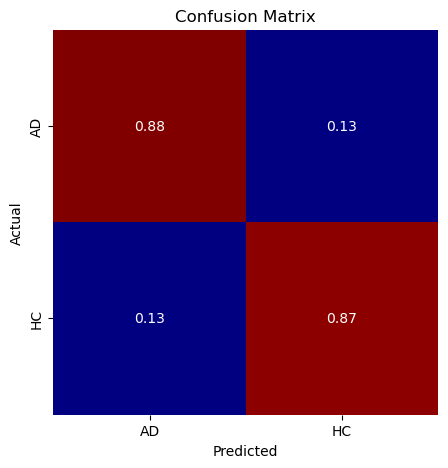

('              precision    recall  f1-score   support\n\n           0       0.87      0.88      0.87       318\n           1       0.87      0.87      0.87       306\n\n    accuracy                           0.87       624\n   macro avg       0.87      0.87      0.87       624\nweighted avg       0.87      0.87      0.87       624\n', <Figure size 500x500 with 1 Axes>)


In [176]:
y_pred = clf.predict(X_test_reshape)

print(accuracy_score(y_test, y_pred))
print(showClassficationReport(y_test, y_pred, ["AD", "HC"]))

# KNN

In [154]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)


In [155]:
neigh.fit(X_train_reshape,y_train.ravel())

KNeighborsClassifier()

0.905448717948718


c:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


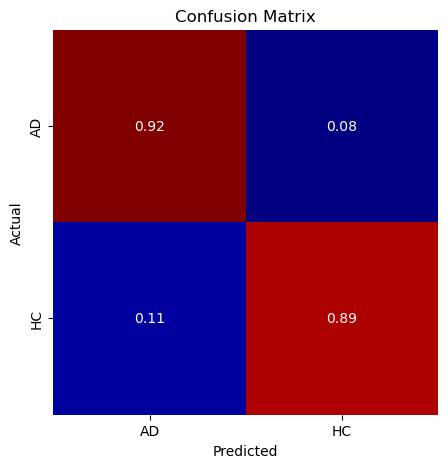

('              precision    recall  f1-score   support\n\n           0       0.90      0.92      0.91       320\n           1       0.92      0.89      0.90       304\n\n    accuracy                           0.91       624\n   macro avg       0.91      0.91      0.91       624\nweighted avg       0.91      0.91      0.91       624\n', <Figure size 500x500 with 1 Axes>)


In [156]:
y_pred=neigh.predict(X_test_reshape)

print(accuracy_score(y_test, y_pred))

class_report = showClassficationReport(y_pred , y_test.T[0], ["AD", "HC"] )
print(class_report)

## Deep Neural Network

In [141]:
X = Variable(torch.from_numpy(X.astype(np.float32)), requires_grad=False)
Y = Variable(torch.from_numpy(Y.astype(np.float32)), requires_grad=False)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(   
     X, Y, test_size=0.3, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(   
#     X_train, y_train, test_size=0.1, random_state=42)

In [143]:
data_dist = {"train" : len(X_train), "test" : len(X_test) } #, "val" : len(X_val)}
data_dist

{'train': 2184, 'test': 936}

In [144]:
# Network Initialization 

model = nn.Sequential(
          nn.Conv2d(1,16,3),
          nn.Conv2d(16,16,3),
          nn.MaxPool2d(2),
          nn.Dropout(),
          nn.Conv2d(16,32,3),
          nn.Conv2d(32,32,3),
          nn.MaxPool2d(3),
          nn.Dropout(),
          nn.Flatten(),
          nn.Linear(32, 160),
          nn.Dropout(),
          nn.Linear(160, 1),
          nn.Sigmoid()
        )
model.to("cuda")

#summary(model, (1,20,20))

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.5, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (6): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.5, inplace=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=32, out_features=160, bias=True)
  (10): Dropout(p=0.5, inplace=False)
  (11): Linear(in_features=160, out_features=1, bias=True)
  (12): Sigmoid()
)

In [145]:
batch_size = 64
train_ds = torch.utils.data.TensorDataset(X_train, y_train)
validation_ds = torch.utils.data.TensorDataset(X_test, y_test)


train_ds_loader = torch.utils.data.DataLoader(train_ds,shuffle=True, batch_size=64)
val_ds_loader = torch.utils.data.DataLoader(validation_ds,shuffle=True, batch_size=936)

In [146]:
for d1, l1 in val_ds_loader:
    print(l1.shape)



torch.Size([936, 1])


In [147]:
import torch.optim as optim
import copy



loss_fn=nn.BCELoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [148]:
num_epoch = 300 
train_losses=[]
valid_losses=[]

# Hold the best model
best_acc = - np.inf   # init to negative infinity
best_weights = None

In [162]:
num_epoch = 300
for epoch in range(1,num_epoch+1):
  train_loss=0.0
  valid_loss=0.0
  train_f1 = []
  train_acc = []

  model.train()
  for img,lbl in train_ds_loader:
    img=img.cuda()
    lbl=lbl.cuda()
    #img=img.cpu()
    #lbl=lbl.cpu()

    optimizer.zero_grad()
    predict=model(img.view(img.shape[0],1,20,20))
    loss=loss_fn(predict,lbl)
    loss.backward()
    optimizer.step()

    train_loss+=loss.item()*img.size(0)

    label = lbl.flatten().cpu()
    prediction = predict.cpu().detach().numpy()
    train_acc.append(accuracy_score(label, prediction.round())) 
    train_f1.append(f1_score(label, prediction.round())) 


  train_loss=train_loss/len(train_ds_loader.sampler) 
  valid_loss=valid_loss/len(val_ds_loader.sampler)
  train_losses.append(train_loss)

  train_acc = np.mean(train_acc)
  train_f1 = np.mean(train_f1)

  # Evaluation 
  model.eval()

  for img,lbl in val_ds_loader: 
    img=img.cuda()
    lbl=lbl.cuda()

    predict=model(img.view(img.shape[0],1,20,20))

    loss=loss_fn(predict,lbl)
    valid_loss =loss.item()*img.size(0)
    valid_losses.append(valid_loss)

    label = lbl.flatten().cpu()
    prediction = predict.cpu().detach().numpy()
    val_acc = accuracy_score(label, prediction.round())
    val_f1 = f1_score(label, prediction.round())
  
    if(val_acc + val_f1 > best_acc):
      best_acc = val_acc + val_f1
      best_weights = copy.deepcopy(model.state_dict())
    if(val_acc + val_f1 >= 2 ):
      best_weights = copy.deepcopy(model.state_dict())
      print(l1.shape)
      print(showClassficationReport(label, prediction.round(), ["AD", "HC"]))
      break

  print('Epoch:{} Train Loss:{:.4f} valid Losss:{:.4f} Train Accuracy:{:.4f} Train F1:{:.4f} Valid Accuracy:{:.4f} Valid F1:{:.4f} best_acc {:.4f}'.format(epoch,train_loss,valid_loss, train_acc, train_f1, val_acc, val_f1, best_acc)) 

Epoch:1 Train Loss:0.2750 valid Losss:221.9669 Train Accuracy:0.8812 Train F1:0.8790 Valid Accuracy:0.9241 Valid F1:0.9224 best_acc 1.8507
Epoch:2 Train Loss:0.2749 valid Losss:224.8324 Train Accuracy:0.8804 Train F1:0.8788 Valid Accuracy:0.9103 Valid F1:0.9112 best_acc 1.8507
Epoch:3 Train Loss:0.2704 valid Losss:227.3504 Train Accuracy:0.8853 Train F1:0.8851 Valid Accuracy:0.9124 Valid F1:0.9126 best_acc 1.8507
Epoch:4 Train Loss:0.2832 valid Losss:223.8393 Train Accuracy:0.8786 Train F1:0.8780 Valid Accuracy:0.9145 Valid F1:0.9153 best_acc 1.8507
Epoch:5 Train Loss:0.2536 valid Losss:228.3556 Train Accuracy:0.8911 Train F1:0.8908 Valid Accuracy:0.9167 Valid F1:0.9179 best_acc 1.8507
Epoch:6 Train Loss:0.2652 valid Losss:223.6368 Train Accuracy:0.8750 Train F1:0.8735 Valid Accuracy:0.9177 Valid F1:0.9182 best_acc 1.8507
Epoch:7 Train Loss:0.2630 valid Losss:227.1754 Train Accuracy:0.8772 Train F1:0.8796 Valid Accuracy:0.9103 Valid F1:0.9093 best_acc 1.8507
Epoch:8 Train Loss:0.2732 v

<AxesSubplot:>

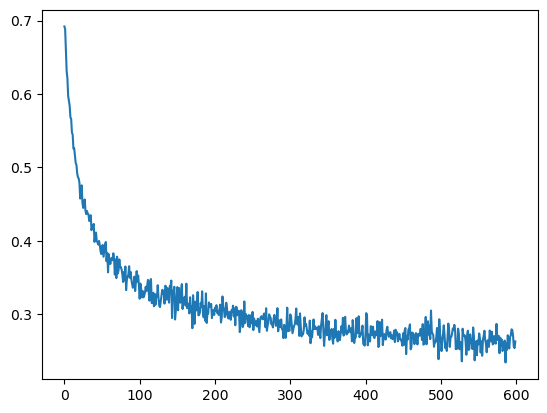

In [151]:
train_losses
sns.lineplot(x=range(len(train_losses)), y=train_losses)

<AxesSubplot:>

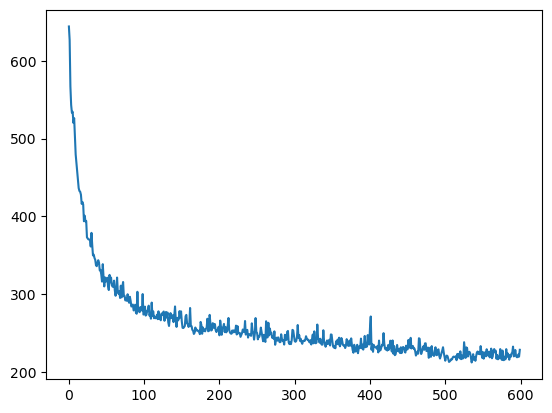

In [152]:
sns.lineplot(x=range(len(valid_losses)), y=valid_losses)

In [153]:
best_weights_copy = best_weights

In [154]:
model.load_state_dict(best_weights)

<All keys matched successfully>

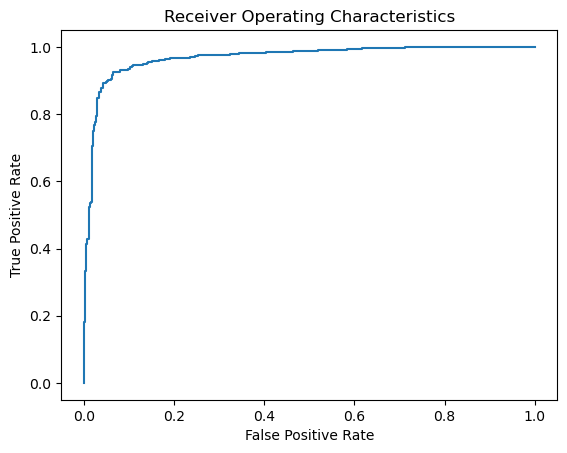

In [155]:
with torch.no_grad():
    # Plot the ROC curve
    img,lbl in val_ds_loader
    y_pred = model(img.view(img.shape[0],1,20,20))
    fpr, tpr, thresholds = roc_curve(lbl.cpu(), y_pred.cpu())
    plt.plot(fpr, tpr) # ROC curve = TPR vs FPR
    plt.title("Receiver Operating Characteristics")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

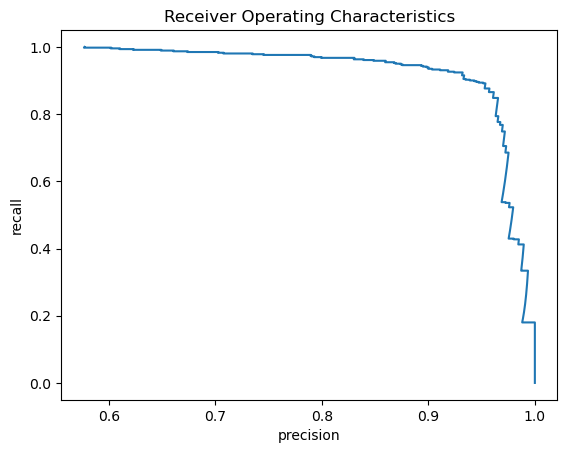

In [156]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve




with torch.no_grad():
    # Plot the ROC curve
    img,lbl in val_ds_loader
    y_pred = model(img.view(img.shape[0],1,20,20))
    fpr, tpr, thresholds = precision_recall_curve(lbl.cpu(), y_pred.cpu())
    plt.plot(fpr, tpr) # ROC curve = TPR vs FPR
    plt.title("Receiver Operating Characteristics")
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.show()

In [157]:
f1 = (2*fpr*tpr)/(fpr+tpr)

threashold = f1.argmax()

thresholds[threashold]

f1[threashold]

0.9281045751633987

In [158]:
fpr[threashold]

0.9321663019693655

In [159]:
thresholds[threashold]

0.46915102

In [160]:
model.cuda()

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.5, inplace=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (6): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.5, inplace=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=32, out_features=160, bias=True)
  (10): Dropout(p=0.5, inplace=False)
  (11): Linear(in_features=160, out_features=1, bias=True)
  (12): Sigmoid()
)

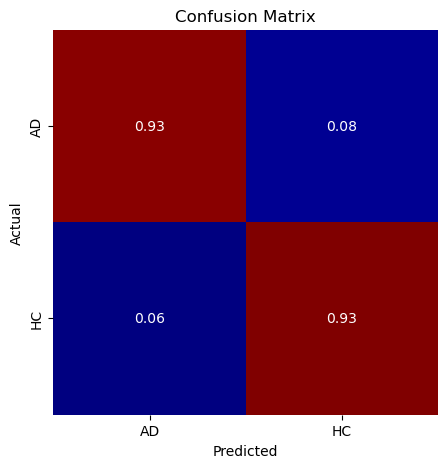

              precision    recall  f1-score   support

       False       0.93      0.93      0.93       480
        True       0.92      0.93      0.93       456

    accuracy                           0.93       936
   macro avg       0.93      0.93      0.93       936
weighted avg       0.93      0.93      0.93       936



In [161]:
img,lbl in val_ds_loader
y_pred = model(img.view(img.shape[0],1,20,20)).cpu().detach().numpy()

y_pred = y_pred >  thresholds[threashold]# 0.5

print(showClassficationReport(lbl.cpu(), y_pred, ["AD", "HC"]))


In [86]:
val_acc = accuracy_score(lbl.cpu(), y_pred.round())
val_f1 = f1_score(lbl.cpu(), y_pred.round())

print(val_acc, val_f1)

0.9145299145299145 0.9141630901287554


In [322]:
len(y_pred)

16

In [320]:
lbl.cpu()

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])

In [141]:
torch.save(model.state_dict(), "Model/5sec_f1_0.89.model")

# Average matrices

In [434]:
hc_idx = list(np.where(df_usampling["Condition"] == "HC")[0])
ad_idx = list(np.where(df_usampling["Condition"] == "AD")[0])

In [435]:
corr_hc = np.zeros((20,20))
corr_ad = np.zeros((20,20))

In [436]:
for i in hc_idx: 
    corr_hc += X[i]
corr_hc = corr_hc/len(hc_idx)
for i in ad_idx: 
    corr_ad += X[i]

corr_ad = corr_ad/len(ad_idx)

<AxesSubplot:>

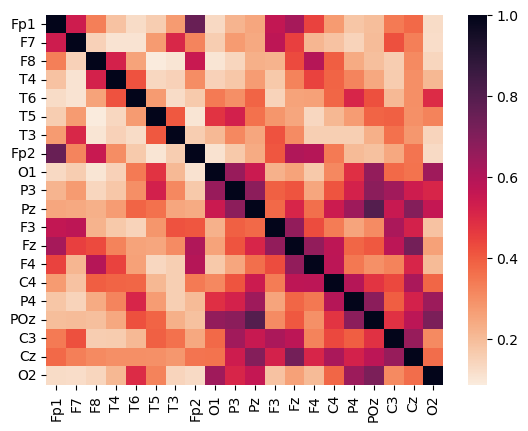

In [445]:
cmap = sns.cm.rocket_r

sns.heatmap(corr_hc**2, cmap=cmap, vmax=1, xticklabels=channels, yticklabels=channels)

<AxesSubplot:>

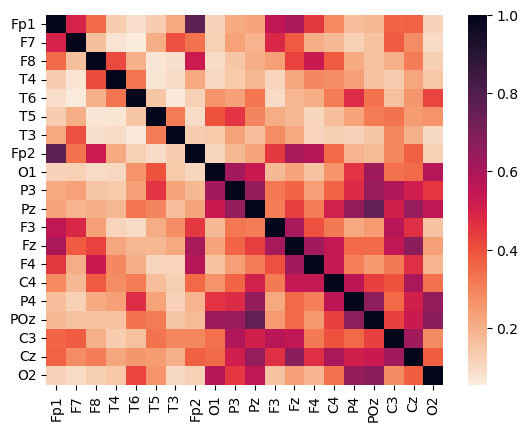

In [446]:
sns.heatmap(corr_ad**2, cmap=cmap, vmax=1, xticklabels=channels, yticklabels=channels)

<AxesSubplot:>

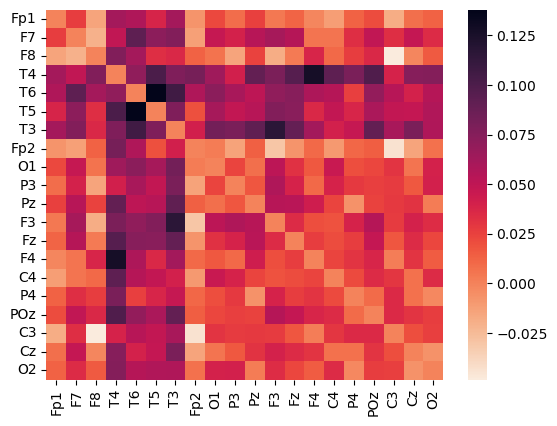

In [448]:
sns.heatmap((corr_hc-corr_ad), cmap=cmap, xticklabels=channels, yticklabels=channels)